In [10]:
import gymnasium as gym
import numpy as np
import math
from sb3_contrib.common.maskable.policies import MaskableActorCriticPolicy
from sb3_contrib.common.wrappers import ActionMasker
from sb3_contrib.ppo_mask import MaskablePPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy

import matplotlib.pyplot as plt




In [11]:
from hpc_env import HPCenv

In [12]:
WORKLOAD_PATH = "data/workloads/lublin_256.swf"

#### Define masking function

In [13]:
def mask_fn(env: gym.Env) -> np.ndarray:
    # Do whatever you'd like in this function to return the action mask
    # for the current env. In this example, we assume the env has a
    # helpful method we can rely on.
    return env.valid_action_mask()

In [18]:
env = HPCenv(workload_path=WORKLOAD_PATH, debug=True)
masking_function = mask_fn

env = ActionMasker(env, mask_fn) 
env = Monitor(env)

model = MaskablePPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, progress_bar=True)

/Users/mikkeldahl/green_scheduler_v2/.venv/lib/python3.12/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Max Allocated Processors: 256 ;max node: 256 ;max procs: 256 ;max execution time: 124707
Using cpu device
Wrapping the env in a DummyVecEnv.


Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 205       |
|    ep_rew_mean     | -3.44e+05 |
| time/              |           |
|    fps             | 1232      |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 2048      |
----------------------------------


Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 208          |
|    ep_rew_mean          | -3.58e+05    |
| time/                   |              |
|    fps                  | 982          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 8.052739e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.06        |
|    explained_variance   | 7.51e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.31e+08     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000132    |
|    value_loss           | 1.45e+09     |
------------------------------------------


Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 203          |
|    ep_rew_mean          | -3.55e+05    |
| time/                   |              |
|    fps                  | 905          |
|    iterations           | 3            |
|    time_elapsed         | 6            |
|    total_timesteps      | 6144         |
| train/                  |              |
|    approx_kl            | 7.096096e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.16        |
|    explained_variance   | 4.95e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 4.87e+08     |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.000149    |
|    value_loss           | 1.21e+09     |
------------------------------------------


Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

100  jobs scheduled, terminating episode

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

Job scheduled

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 202          |
|    ep_rew_mean          | -3.64e+05    |
| time/                   |              |
|    fps                  | 878          |
|    iterations           | 4            |
|    time_elapsed         | 9            |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 5.120819e-07 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.21        |
|    explained_variance   | 2.98e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 9.87e+08     |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.00013     |
|    value_loss           | 1.33e+09     |
------------------------------------------


KeyboardInterrupt: 

In [15]:

# Now these calls should work correctly!
rewards = env.get_episode_rewards()
lengths = env.get_episode_lengths()
times = env.get_episode_times()

print("\n--- Results ---")
print("Total episodes:", len(rewards))
print("First 10 Rewards:", rewards[:10])

print("First 10 Episode lengths:", lengths[:10])
print("First 10 Episode times:", times[:10])


--- Results ---
Total episodes: 494
First 10 Rewards: [-135379.5391638889, -171278.29687222224, -280033.40369305556, -202634.20558333333, -530984.1377, -701650.4935416667, -143691.84664166666, -416196.12912777776, -584179.7861097222, -347321.6275652778]
First 10 Episode lengths: [185, 199, 177, 192, 184, 243, 179, 175, 178, 225]
First 10 Episode times: [0.089508056640625, 0.17414498329162598, 0.2540428638458252, 0.3365910053253174, 0.4162309169769287, 0.5184481143951416, 0.5943679809570312, 0.6696059703826904, 0.7454359531402588, 0.8393959999084473]


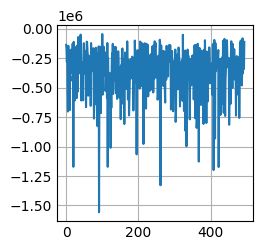

In [16]:
plt.style.use('_mpl-gallery')
x = np.arange(1,273)
fig, ax = plt.subplots()
ax.plot(rewards)

plt.show()


NameError: name 'episode_steps' is not defined

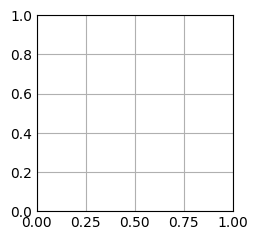

In [17]:
plt.style.use('_mpl-gallery')
x = np.arange(1,273)
fig, ax = plt.subplots()
ax.plot(episode_steps)

plt.show()


### Comparison and validation
